In [2]:
import numpy as np 
import pandas as pd

In [3]:
df = pd.read_csv(r"C:\Users\Felicity\Downloads\train_data.csv")
df2 = pd.read_csv(r"C:\Users\Felicity\Downloads\test_data.csv")

print(df.shape)
print(df2.shape)

(42000, 785)
(28000, 784)


In [25]:
# drop dependant variable
x = df.drop('label',axis=1)
y = df.label


In [26]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

x = scaler.fit_transform(x)
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [27]:
# Reshape the above array to one colunm
x = x.reshape((42000,28,28,1))
x

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

In [28]:

x1 = np.array(df2)
x1 = scaler.fit_transform(x1)
x1 = x1.reshape((28000,28,28,1))
x1

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

In [29]:
y = np.array(y)

from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(sparse=False)
y= y.reshape((-1,1))
y = enc.fit_transform(y)

y

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [30]:
from sklearn.model_selection import train_test_split 

# Splitting the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Printing the shapes of the resulting sets
print("Shape of x_train:", x_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of x_test:", x_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of x_train: (33600, 28, 28, 1)
Shape of y_train: (33600, 10)
Shape of x_test: (8400, 28, 28, 1)
Shape of y_test: (8400, 10)


In [31]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

In [32]:
model = keras.Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

In [33]:
from tensorflow import keras

callbacks = [
    keras.callbacks.EarlyStopping(
        # Stop training when `val_loss` is no longer improving
        monitor='val_loss',
        # "no longer improving" being defined as "no better than 1e-2 less"
        min_delta=1e-5,
        # "no longer improving" being further defined as "for at least 2 epochs"
        patience=25,
        verbose=1)
]

Epoch 1/20
657/657 [==============================] - 200s 299ms/step - loss: 0.3298 - accuracy: 0.8959 - val_loss: 0.0536 - val_accuracy: 0.9845
Epoch 2/20
657/657 [==============================] - 193s 293ms/step - loss: 0.1021 - accuracy: 0.9726 - val_loss: 0.0321 - val_accuracy: 0.9905
Epoch 3/20
657/657 [==============================] - 191s 291ms/step - loss: 0.0709 - accuracy: 0.9805 - val_loss: 0.0195 - val_accuracy: 0.9936
Epoch 4/20
657/657 [==============================] - 194s 295ms/step - loss: 0.0584 - accuracy: 0.9836 - val_loss: 0.0168 - val_accuracy: 0.9944
Epoch 5/20
657/657 [==============================] - 201s 306ms/step - loss: 0.0495 - accuracy: 0.9865 - val_loss: 0.0156 - val_accuracy: 0.9952
Epoch 6/20
657/657 [==============================] - 201s 305ms/step - loss: 0.0482 - accuracy: 0.9865 - val_loss: 0.0156 - val_accuracy: 0.9958
Epoch 7/20
657/657 [==============================] - 192s 292ms/step - loss: 0.0429 - accuracy: 0.9883 - val_loss: 0.0100 -

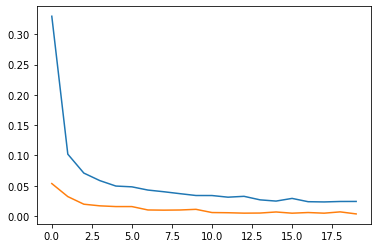

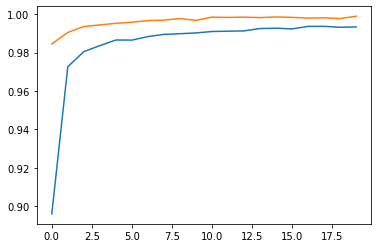

In [34]:
model.compile(optimizer='adam', loss="categorical_crossentropy",metrics=["accuracy"])

history = model.fit(x,y,batch_size=64,epochs=20,validation_data=(x_test,y_test))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.figure()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [35]:
predictions=model.predict(x1)
pre=predictions.argmax(axis=-1)

875/875 [==============================] - 32s 36ms/step


In [36]:
submission = pd.Series(pre,name="Label")
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),submission],axis = 1)
submission.to_csv("result.csv",index=False)
submission.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3


In [37]:
prediction=model.predict(x)
pred=prediction.argmax(axis=-1)

1313/1313 [==============================] - 49s 37ms/step


In [ ]:
# predicting Hand written digit on images using CNN